In [60]:

import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
# %matplotlib inline
import seaborn as sns  


import sklearn  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [80]:
df = pd.read_csv("iris_dataset.csv") 

In [93]:
# df.head()
# df[:10]
# df['class'].describe()
# df.info()

Sources:
    https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.html
        https://seaborn.pydata.org/generated/seaborn.pairplot.html
            https://seaborn.pydata.org/tutorial/color_palettes.html

VISUAL ANALYSIS- box plot

Text(0.5,0.9,'Boxplots of features based on Class of Iris Flower')

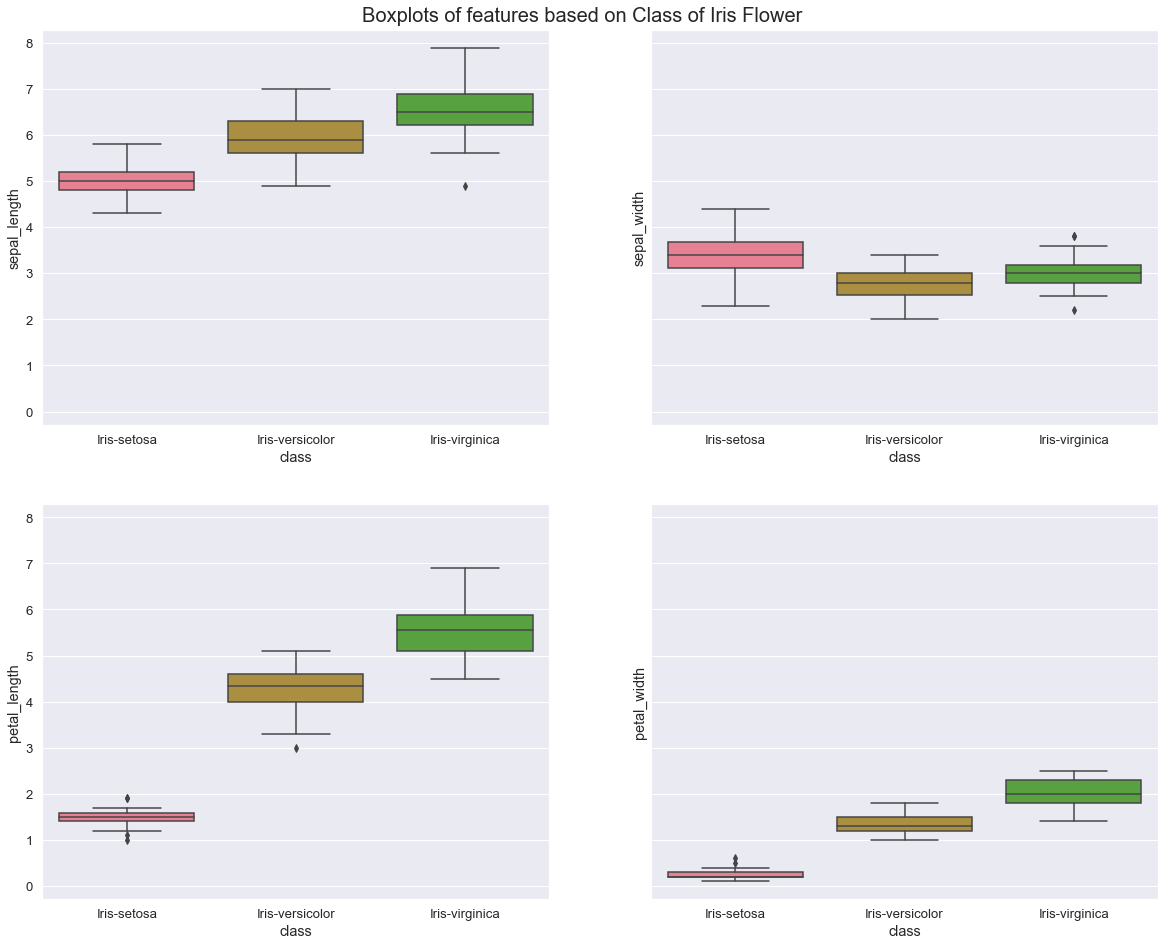

In [66]:
f,ax=plt.subplots(2,2,figsize=(20,16),sharey=True)
# sns.set_style("darkgrid")
# sns.set_palette("husl")
sns.set(style="darkgrid", palette="husl", font_scale=1.2)
sns.set_context(font_scale=3)
sns.boxplot(x='class',y='sepal_length',data=df,ax=ax[0,0])
sns.boxplot(x='class',y='sepal_width' ,data=df,ax=ax[0,1])
sns.boxplot(x='class',y='petal_length',data=df,ax=ax[1,0])
sns.boxplot(x='class',y='petal_width',data=df,ax=ax[1,1])
f.suptitle("Boxplots of features based on Class of Iris Flower", y=0.9,size=20)

The boxplots above have been ploted on the same scale to examine data distribution. Boxplots provide a clear visual representaion of each feature and allows for easy comparison with respesct to features as well as class. 

For our first feature, sepal_length, we see that they range from approxiamtely 4.2 cm to 8 cm. While the median value lies around the middle of the data for Setosa and Veriscolor, the same cannot be said about Virginica. We see an outlier for this feature as well as a larger difference between 75th quartile and the maximum value. It's safe to say there is high variance for this particualr calss's feature. Versicolor's data overlaps with both of the other two class. Setosa and Virgina has a negligible amount of overlap.

The second feature sepal_width ranges from 2 cm to around 4.5 cm. With such a small range, all three classes' data points overlap with each other. While Versicolor and Virginica have very similar data distributions,Setosa's feature has larger values in comparison.

The third feature, petal_length, has a large variation in values. Data points range from approximately 1 cm-7 cm. The class Setosa has a small range of 1-2 cm, and clearly stnad out. The other two classes have much higher values for this feature. Despite the overlap between Versicolor and Virginica, their median values are quite far off. We can assume that for the most part, these two classes are fairly distinguilshable.

The last feature, petal_width is vastly different from the other features. The data points range from around 0.2 cm-2.5 cm. Each class's feature range is also small. Similar to feature no.3, Setosa's data points are much smaller than the other two classes. The other two classes have some overlap but the highest value for Versicolor is approximately equal to 25th quartile for Virginica.

When classifying sample points into target labels, petal_length and peta_width will be more important. The class Setosa stands out from the other two classes based on the aforementioned features. As for Versicolor and Virginica, petal_length and sepal_length differentiate the two.

In [84]:
# g = sns.pairplot(df, hue="class", diag_kind="kde",palette="husl",height=4)
# g.fig.suptitle("Pairwise comparison of features for Different Iris flowers",y=1)

KNN WITHOUT FEATURE SCALING

In [67]:
df['class'] = df['class'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2} ).astype(int) 

In [69]:
# "KNN parameters:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"

KNN WIHTOUT FEATURE SCALING

In [70]:
def knn(rs,d): # random state, distance
    
    X_train = df.drop("class", axis=1) #features
    Y_train = df["class"] #target label
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=rs, shuffle = True)
#     X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
    
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=d, 
                           weights='uniform')
    
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    ## See how the model performs on the test data.
    acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
    return acc_knn

In [71]:
random_1= 101 #random state
random_2=1
random_3=71
dist1= 2 #euclidean distance
dist2 =1 #manhattan distance
knn1=knn(random_1, dist1)
knn2=knn(random_1,dist2)
knn3=knn(random_2, dist1)
knn4=knn(random_2,dist2)
knn5=knn(random_3, dist1)
knn6=knn(random_3,dist2)

KNN WITH FEATURE SCALING

In [72]:
#  StandardScaler that implements the Transformer API to compute the mean 
#     and standard deviation on a training set 
#     so as to be able to later reapply the same transformation on the testing set. 

In [73]:
def knn_stand(rs,d):
    
    X_train = df.drop("class", axis=1) #features
    Y_train = df["class"] #target label
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=rs, shuffle = True)
#     X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
    
    scaler_train = preprocessing.StandardScaler().fit(X_train)
    X_train_n = scaler_train.transform(X_train)

    scaler_test = preprocessing.StandardScaler().fit(X_test)
    X_test_n = scaler_test.transform(X_test)

    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                               metric_params=None, n_jobs=1, n_neighbors=10, p=d, 
                               weights='uniform')
    knn.fit(X_train_n, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_test_n, Y_test) * 100, 2)
    
   
    return acc_knn

In [74]:
knn_stand1=knn_stand(random_1, dist1)
knn_stand2=knn_stand(random_1,dist2)
knn_stand3=knn_stand(random_2, dist1)
knn_stand4=knn_stand(random_2,dist2)
knn_stand5=knn_stand(random_3, dist1)
knn_stand6=knn_stand(random_3,dist2)

In [75]:
def knn_minmax(rs,d):
    X_train = df.drop("class", axis=1) #features
    Y_train = df["class"] #target label
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=rs, shuffle = True)
#     X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
    
    min_max_scaler_train = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler_train.fit_transform(X_train)

    min_max_scaler_test = preprocessing.MinMaxScaler()
    X_test_minmax = min_max_scaler_test.fit_transform(X_test)

    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                               metric_params=None, n_jobs=1, n_neighbors=10, p=d, 
                               weights='uniform')
    knn.fit(X_train_minmax, Y_train)
    y_pred = knn.predict(X_test_minmax)
    acc_knn = round(knn.score(X_test_minmax, Y_test) * 100, 2)
    
    return acc_knn

In [76]:
knn_minmax1=knn_minmax(random_1, dist1)
knn_minmax2=knn_minmax(random_1,dist2)
knn_minmax3=knn_minmax(random_2, dist1)
knn_minmax4=knn_minmax(random_2,dist2)
knn_minmax5=knn_minmax(random_3, dist1)
knn_minmax6=knn_minmax(random_3,dist2)

In [77]:

data={  'Results':['KNN/Euclidean','KNN/Manhattan','KNN/Euclidean/Standard Scaling',
                  'KNN/Manhattan/Standarad Scaling','KNN/Euclidean/MinMax Scaling','KNN/Manhattan/MinMax Scaling'],
        'Accuracy 1': [knn1, knn2, knn_stand1, knn_stand2, knn_minmax1, knn_minmax2],
        'Accuracy 2' :[knn3, knn4, knn_stand3, knn_stand4, knn_minmax3, knn_minmax4],
         'Accuracy 3' :[knn5, knn6, knn_stand5, knn_stand6, knn_minmax5, knn_minmax6]}
df=pd.DataFrame(data, columns=['Results','Accuracy 1','Accuracy 2','Accuracy 3'])

In [78]:
print("Accuracy scores for various KNN methods based on different random states ")
df

Accuracy scores for various KNN methods based on different random states 


,Results,Accuracy 1,Accuracy 2,Accuracy 3
0,KNN/Euclidean,100.00,97.78,93.33
1,KNN/Manhattan,97.78,95.56,93.33
2,KNN/Euclidean/Standard Scaling,97.78,95.56,88.89
3,KNN/Manhattan/Standarad Scaling,97.78,95.56,91.11
4,KNN/Euclidean/MinMax Scaling,97.78,93.33,93.33
5,KNN/Manhattan/MinMax Scaling,95.56,93.33,93.33


The KNN model has been run with different parameters, namely distance as well as with and without feature scaling. Additionally, the model was given 3 different random states. The columns for the table above show accuracy scores for the KNN model based on the different random states.


In terms of accuracy scores, scaling the features has not increased the model's performance. Using a Euclidean distance without feature scaling consistently showed high accuracy scores. Only in the third round, accuracy scores remained the same for the model with feature scaling using MinMax and without feature scaling.

In [92]:
# http://benalexkeen.com/feature-scaling-with-scikit-learn/

# df = pd.read_csv("iris_dataset.csv") 
# df=df.drop("class", axis=1)

# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=['sepal_length','sepal_width','petal_length','petal_width'])


# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 8))
# # 	sepal_length	sepal_width	petal_length	petal_width
# ax1.set_title('Before Scaling')
# sns.kdeplot(df['sepal_length'], ax=ax1)
# sns.kdeplot(df['sepal_width'], ax=ax1)
# sns.kdeplot(df['petal_length'], ax=ax1)
# sns.kdeplot(df['petal_width'], ax=ax1)
# ax2.set_title('After Standard Scaler')
# sns.kdeplot(scaled_df['sepal_length'], ax=ax2)
# sns.kdeplot(scaled_df['sepal_width'], ax=ax2)
# sns.kdeplot(scaled_df['petal_length'], ax=ax2)
# sns.kdeplot(scaled_df['petal_width'], ax=ax2)
# plt.show()

In [91]:
# scaler = preprocessing.MinMaxScaler()
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=['sepal_length','sepal_width','petal_length','petal_width'])

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 8))
# ax1.set_title('Before Scaling')
# sns.kdeplot(df['sepal_length'], ax=ax1)
# sns.kdeplot(df['sepal_width'], ax=ax1)
# sns.kdeplot(df['petal_length'], ax=ax1)
# sns.kdeplot(df['petal_width'], ax=ax1)
# ax2.set_title('After Standard Scaler')
# sns.kdeplot(scaled_df['sepal_length'], ax=ax2)
# sns.kdeplot(scaled_df['sepal_width'], ax=ax2)
# sns.kdeplot(scaled_df['petal_length'], ax=ax2)
# sns.kdeplot(scaled_df['petal_width'], ax=ax2)
# plt.show()